# JSON info-arch

Testing the functionality to exchange information as JSON-like strings.

In [2]:
import json

from interpml import config, utils
from interpml import info_architecture as ia
from interpml import plotting

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pprint import pprint

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Defined by lists of (row1, col1, height, width) tuples
height, width = 10, 12

# 2-component dashboards
split = 8
spec1 = [
    (0, 0, height, split),
    (0, split, height, width - split)
]

split = 4
spec2 = [
    (0, 0, height, split),
    (0, split, height, width - split)
]

split = 4
spec3 = [
    (0, 0, split, width),
    (split, 0, height - split, width)
]

split = 6
spec4 = [
    (0, 0, split, width),
    (split, 0, height - split, width)
]

# 3-component dashboards
split = 6, 4
spec5 = [
    (0, 0, height, split[0]),
    (0, split[0], split[1], width - split[0]),
    (split[1], split[0], height - split[1], width - split[0])
]

split = 5, 6
spec6 = [
    (0, 0, height, split[0]),
    (0, split[0], split[1], width - split[0]),
    (split[1], split[0], height - split[1], width - split[0])
]

split = 5, 4
spec7 = [
    (0, 0, split[0], split[1]),
    (split[0], 0, height - split[0], split[1]),
    (0, split[1], height, width - split[1])
]

split = 4, 6
spec8 = [
    (0, 0, split[0], split[1]),
    (split[0], 0, height - split[0], split[1]),
    (0, split[1], height, width - split[1])
]

split = 4, 6
spec9 = [
    (0, 0, split[0], split[1]),
    (0, split[1], split[0], width - split[1]),
    (split[0], 0, height - split[0], width)
]

split = 6, 4
spec10 = [
    (0, 0, split[0], split[1]),
    (0, split[1], split[0], width - split[1]),
    (split[0], 0, height - split[0], width)
]

split = 4, 6
spec11 = [
    (0, 0, split[0], width),
    (split[0], 0, height - split[0], split[1]),
    (split[0], split[1], height - split[0], width - split[1])
]

split = 6, 4
spec12 = [
    (0, 0, split[0], width),
    (split[0], 0, height - split[0], split[1]),
    (split[0], split[1], height - split[0], width - split[1])
]

specs = [
    spec1, spec2, spec3, spec4, spec5, spec6,
    spec7, spec8, spec9, spec10, spec11, spec12
]

In [4]:
treemaps = []
info_archs = []
for i, arch in enumerate(specs):
    for j in range(3):
        arr = ia.spec2arr(arch, n_components=4, height=height, width=width)
        treemaps.append(arr)
        try:
            info_archs.append(ia.InfoArchTree.from_array(i * 20 + j, arr, height=height, width=width))
        except:
            pass

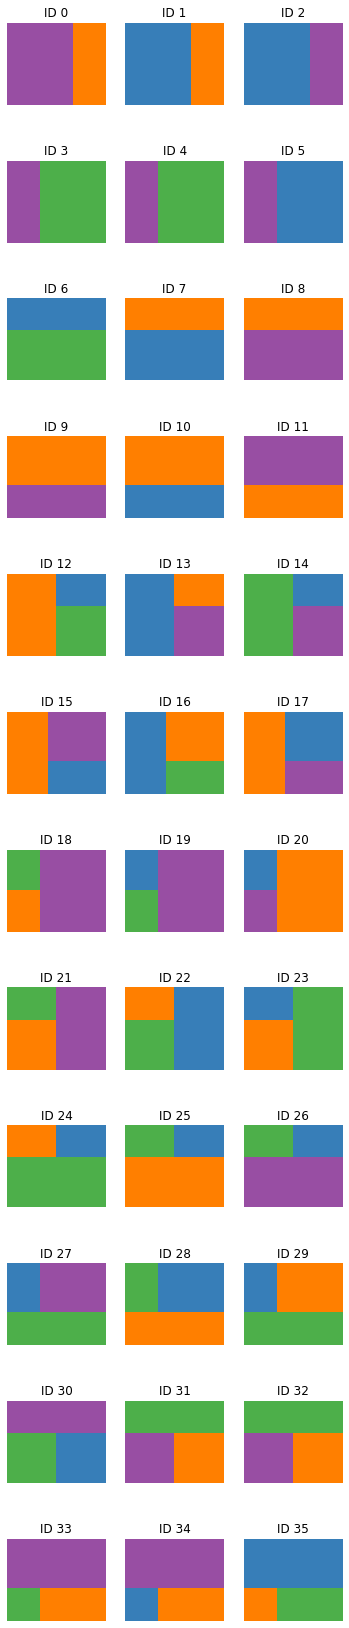

In [5]:
fig, axs = plt.subplots(len(specs), 3, figsize=(3 * 2, len(specs) * 2.5))
for i, (treemap, ax) in enumerate(zip(treemaps, axs.flat)):
    plotting.plot_treemap(treemap, ax=ax, vmin=0, vmax=9, cmap='Set1')
    ax.set_title(f'ID {i}')
    ax.axis('off')

In [6]:
jsondict = info_archs[19].to_json()
tree = ia.InfoArchTree.from_json(jsondict)

In [7]:
print(tree)

[], 1.00, v
|----[], 0.33, v
|    |----1.0, 0.50, h
|    |----[], 0.50, h
|    |    |----2.0, 1.00, h
|----3.0, 0.67, v


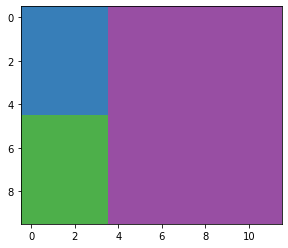

In [8]:
plotting.plot_treemap(treemaps[19], vmin=0, vmax=9, cmap='Set1')

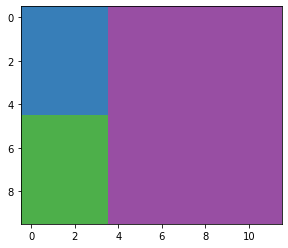

In [10]:
plotting.plot_treemap(tree.to_array(), vmin=0, vmax=9, cmap='Set1')

## Saving info_archs

In [11]:
ia_json = {"architectures": list([info_arch.to_json() for info_arch in info_archs])}

In [12]:
pprint(ia_json["architectures"][0])

{'components': {'height': 1,
                'id': -1,
                'left_child': {'height': 1,
                               'id': 3.0,
                               'left_child': {},
                               'orientation': 'v',
                               'right_child': {},
                               'width': 0.6666666666666666},
                'orientation': 'v',
                'right_child': {'height': 1,
                                'id': -1,
                                'left_child': {'height': 1,
                                               'id': 4.0,
                                               'left_child': {},
                                               'orientation': 'v',
                                               'right_child': {},
                                               'width': 1.0},
                                'orientation': 'v',
                                'right_child': {},
                                'width': 0.3

In [13]:
json.dump(ia_json, config.ia_layouts_file.open('w'))

In [14]:
jsondict = json.load(config.ia_layouts_file.open('r'))

In [15]:
treemaps_reloaded = list([ia.InfoArchTree.from_json(info_arch).to_array() for info_arch in jsondict['architectures']])

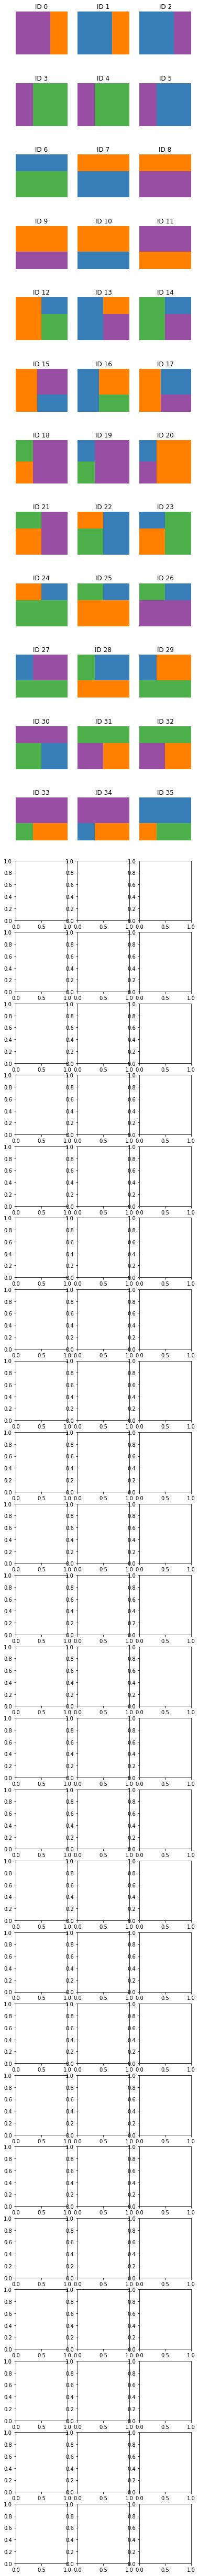

In [16]:
fig, axs = plt.subplots(len(treemaps_reloaded), 3, figsize=(3 * 2, len(treemaps_reloaded) * 2.5))
for i, (treemap, ax) in enumerate(zip(treemaps_reloaded, axs.flat)):
    plotting.plot_treemap(treemap, ax=ax, vmin=0, vmax=9, cmap='Set1')
    ax.set_title(f'ID {i}')
    ax.axis('off')

In [17]:
ia_features = np.stack(list([info_arch.get_feature_vector() for info_arch in info_archs]), axis=0)

In [18]:
ia_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.33333333, 1.        , 1.66666667, ..., 0.        , 0.        ,
        0.        ],
       [3.33333333, 1.        , 1.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 1.        , 2.5       , ..., 0.        , 0.        ,
        0.        ],
       [3.        , 0.        , 1.25      , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
np.savetxt(config.ia_feats_file, ia_features, delimiter=',')

## Testing the API

In [1]:
import subprocess

In [55]:
def run_bayes_opt(obs=None):
    args = ['python', str(config.code / 'run_bayes_opt.py')]
    if obs is not None:
        args.extend(['-i', obs])
    p = subprocess.Popen(args, stdin=subprocess.PIPE, stdout=subprocess.PIPE)
    output, err = p.communicate()
#     print(err)
    return output

In [34]:
output = run_bayes_opt()
ias_init = json.loads(output)

In [36]:
def show_archs(archs):
    for arch in archs:
        tree = ia.InfoArchTree.from_json(arch)
        plotting.plot_treemap(tree.to_array())
        plt.show()

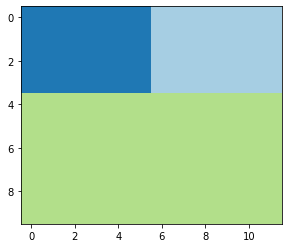

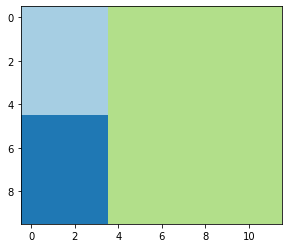

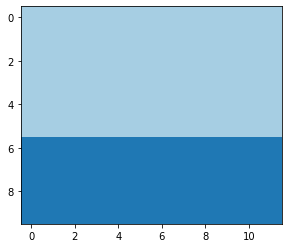

In [37]:
show_archs(ias_init['architectures'])

In [67]:
test_data = [.1, .8, .9]
obs = {
    "meta": {
        "height": 10,
        "width": 12,
        "n_architectures": 1,
        "n_components": 8
    },
    "architectures": ias_init['architectures'],
    "scores": test_data
}
obs_str = json.dumps(obs)
output = json.loads(run_bayes_opt(obs_str))
output

{'architectures': [{'id': 1,
   'height': 10,
   'width': 12,
   'components': {'id': -1,
    'height': 1,
    'width': 1.0,
    'orientation': 'v',
    'left_child': {'id': 1.0,
     'height': 1,
     'width': 0.6666666666666666,
     'orientation': 'v',
     'left_child': {},
     'right_child': {}},
    'right_child': {'id': -1,
     'height': 1,
     'width': 0.33333333333333337,
     'orientation': 'v',
     'left_child': {'id': 4.0,
      'height': 1,
      'width': 1.0,
      'orientation': 'v',
      'left_child': {},
      'right_child': {}},
     'right_child': {}}}}]}

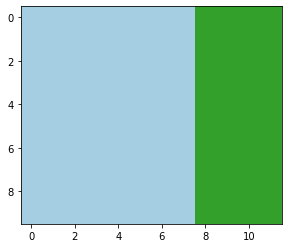

In [68]:
show_archs(output['architectures'])

In [69]:
test_data.append(0.)

In [82]:
test_data

[0.1, 0.8, 0.9, 0.0]

In [84]:
len(archs)

5

In [80]:
archs = ias_init['architectures'] + output['architectures']
obs = {
    "meta": {
        "height": 10,
        "width": 12,
        "n_architectures": 1,
        "n_components": 8
    },
    "architectures": archs,
    "scores": test_data
}

In [81]:
obs_str = json.dumps(obs)
output = json.loads(run_bayes_opt(obs_str))
output

JSONDecodeError: Expecting value: line 1 column 1 (char 0)